# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
import citipy

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# create dataframe for city location
location_df = pd.DataFrame()
                           
# Create columns for holding random latitudes and longitudes in location_df
location_df['lats'] = np.random.uniform(low=-90.000, high=90.000, size=1500)
location_df['langs'] = np.random.uniform(low=-90.000, high=90.000, size=1500)

# Identify nearest city for each lat & long combination
for index, row in location_df.iterrows():
    randomlat = row['lats'] #populates the latitude column 
    randomlang = row['langs'] #populates the longitude column 
    location_df.set_value(index, 'closest city', citipy.nearest_city(randomlat, randomlang).city_name) #creates a column for nearest city
    
# drop repeated values for city
location_df = location_df.drop_duplicates(['closest city'])

# Print the city count and the head of dataframe to confirm sufficient count
print(len(location_df['closest city']))
location_df.head()

/Users/fernandawolburg/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  if sys.path[0] == '':


600


,lats,langs,closest city
0,-40.620738,18.253498,hermanus
1,64.510525,-56.335942,maniitsoq
2,10.971974,-52.467867,mana
3,-21.449794,16.106068,omaruru
4,59.544272,3.827313,holme


In [3]:
# create a list to hold city values, which will be used to make the API requests
cities = list(location_df['closest city'])

# print length of cities list to verify that it matches the length of location_df
len(cities)

600

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?"

# create lists that will hold the city name, country, temperature, humidity, cloudiness, wind speed, and lats/long
city_name = []
country = []
temperature = []
humidity = []
cloudiness = []
wind_speed = []
lat = []
long = []

# start the counter
count = 1

# begin a loop that will iterate through each item in the cities list
for city in cities:
    try:
        response = requests.get(url + "&q=" + city + "&APPID=" + api_key).json() #request and read URL
        city_name.append(response["name"]) #these statements will retrieve the information from the API website and add it to the corresponding list
        country.append(response["sys"]["country"])
        temperature.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        wind_speed.append(response["wind"]["speed"])
        lat.append(response["coord"]["lat"])
        long.append(response["coord"]["lon"])
        country_record = response["sys"]["country"]
        print('Now retrieving coordinates for city #%s: %s, %s' %(count, city, country_record)) #this will print the city as it is being processed
      
    # Increase counter by one 
        count += 1
        
    # If no record found, skip the city and then keep going
    except:
        print("City not found. Skipping...")
    continue

Now retrieving coordinates for city #1: hermanus, ZA
Now retrieving coordinates for city #2: maniitsoq, GL
Now retrieving coordinates for city #3: mana, NG
Now retrieving coordinates for city #4: omaruru, NA
Now retrieving coordinates for city #5: holme, DK
Now retrieving coordinates for city #6: saint-philippe, CA
Now retrieving coordinates for city #7: saint george, GR
Now retrieving coordinates for city #8: agnibilekrou, CI
Now retrieving coordinates for city #9: chicama, PE
Now retrieving coordinates for city #10: bredasdorp, ZA
Now retrieving coordinates for city #11: karasjok, NO
City not found. Skipping...
Now retrieving coordinates for city #12: iskateley, RU
Now retrieving coordinates for city #13: namibe, AO
City not found. Skipping...
Now retrieving coordinates for city #14: ushuaia, AR
Now retrieving coordinates for city #15: banyo, CM
Now retrieving coordinates for city #16: marawi, PH
City not found. Skipping...
Now retrieving coordinates for city #17: huercal-overa, ES
N

Now retrieving coordinates for city #145: port-cartier, CA
Now retrieving coordinates for city #146: bakchar, RU
Now retrieving coordinates for city #147: grand gaube, MU
Now retrieving coordinates for city #148: eydhafushi, MV
Now retrieving coordinates for city #149: havoysund, NO
Now retrieving coordinates for city #150: ostrovnoy, RU
Now retrieving coordinates for city #151: afua, NG
Now retrieving coordinates for city #152: kattivakkam, IN
Now retrieving coordinates for city #153: sistranda, NO
City not found. Skipping...
City not found. Skipping...
Now retrieving coordinates for city #154: sao filipe, CV
Now retrieving coordinates for city #155: venezuela, CU
City not found. Skipping...
Now retrieving coordinates for city #156: mondovi, US
Now retrieving coordinates for city #157: newtonmore, GB
Now retrieving coordinates for city #158: otjiwarongo, NA
Now retrieving coordinates for city #159: fonte boa, BR
City not found. Skipping...
Now retrieving coordinates for city #160: gub

Now retrieving coordinates for city #283: mananjary, MG
Now retrieving coordinates for city #284: narasannapeta, IN
Now retrieving coordinates for city #285: souillac, FR
Now retrieving coordinates for city #286: atar, MR
Now retrieving coordinates for city #287: jasidih, IN
City not found. Skipping...
Now retrieving coordinates for city #288: brae, GB
Now retrieving coordinates for city #289: juruti, BR
Now retrieving coordinates for city #290: hanson, US
Now retrieving coordinates for city #291: pisco, PE
Now retrieving coordinates for city #292: kalmunai, LK
Now retrieving coordinates for city #293: keti bandar, PK
Now retrieving coordinates for city #294: port blair, IN
Now retrieving coordinates for city #295: moyale, ET
Now retrieving coordinates for city #296: qasigiannguit, GL
Now retrieving coordinates for city #297: grindavik, IS
Now retrieving coordinates for city #298: saint-augustin, CA
Now retrieving coordinates for city #299: trairi, BR
Now retrieving coordinates for cit

Now retrieving coordinates for city #422: varkaus, FI
City not found. Skipping...
Now retrieving coordinates for city #423: kaduy, RU
Now retrieving coordinates for city #424: cururupu, BR
Now retrieving coordinates for city #425: barra do corda, BR
Now retrieving coordinates for city #426: mangai, CD
Now retrieving coordinates for city #427: americus, US
Now retrieving coordinates for city #428: novoagansk, RU
Now retrieving coordinates for city #429: kandi, BJ
Now retrieving coordinates for city #430: wilson, US
Now retrieving coordinates for city #431: itarema, BR
Now retrieving coordinates for city #432: eresos, GR
Now retrieving coordinates for city #433: harrismith, ZA
City not found. Skipping...
Now retrieving coordinates for city #434: romans-sur-isere, FR
Now retrieving coordinates for city #435: ussel, FR
Now retrieving coordinates for city #436: campo grande, BR
Now retrieving coordinates for city #437: shaki, AM
Now retrieving coordinates for city #438: joshimath, IN
City n

In [5]:
# create a weather dataframe from the populated lists
weather_df = pd.DataFrame({'city' : city_name,
                          'country' : country,
                          'temperature' : temperature,
                          'humidity' : humidity,
                          'cloudiness' : cloudiness,
                          'wind speed' : wind_speed,
                          'latitude' : lat,
                          'longitued' : long})

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
# export data into a .csv file
weather_df.to_csv('weatherpy.csv')

In [7]:
# display the dataframe
weather_df

,city,country,temperature,humidity,cloudiness,wind speed,latitude,longitued
0,Hermanus,ZA,289.26,89,0,2.72,-34.42,19.24
1,Maniitsoq,GL,278.50,91,100,1.18,65.42,-52.90
2,Mana,NG,307.20,35,87,1.56,13.03,5.27
3,Omaruru,NA,288.60,22,0,2.31,-21.42,15.95
4,Holme,DK,294.15,45,0,4.60,56.11,10.17
5,Saint-Philippe,CA,303.15,47,1,4.60,45.36,-73.48
6,Saint George,GR,304.82,48,40,3.10,39.45,22.34
7,Agnibilekrou,CI,299.20,74,61,0.40,7.13,-3.20
8,Chicama,PE,293.15,77,20,4.60,-7.84,-79.15
9,Bredasdorp,ZA,288.15,72,0,1.50,-34.53,20.04


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

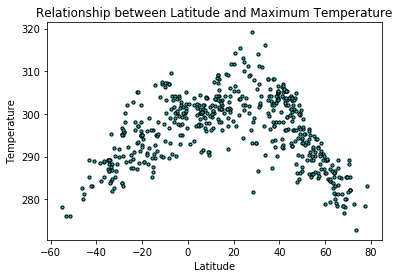

<Figure size 432x288 with 0 Axes>

In [8]:
# create a scatter plot for latitude vs. temperature
plt.scatter(weather_df['latitude'], weather_df['temperature'], s = 10, 
            color = 'c', edgecolor = 'black',linewidth=1)

# add labels and show plot
plt.title('Relationship between Latitude and Maximum Temperature')
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.show()

# save figure
plt.savefig("WEATHERPY_Temperature_Latitude.png")

#### Latitude vs. Humidity Plot

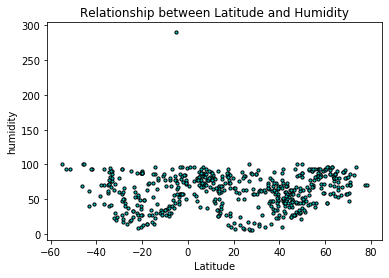

<Figure size 432x288 with 0 Axes>

In [9]:
# create a scatter plot for latitude vs. temperature
plt.scatter(weather_df['latitude'], weather_df['humidity'], s = 10, 
            color = 'c', edgecolor = 'black',linewidth=1)

# add labels and show plot
plt.title('Relationship between Latitude and Humidity')
plt.xlabel('Latitude')
plt.ylabel('humidity')
plt.show()

# save figure
plt.savefig("WEATHERPY_Humidity_vs_Latitude.png")

#### Latitude vs. Cloudiness Plot

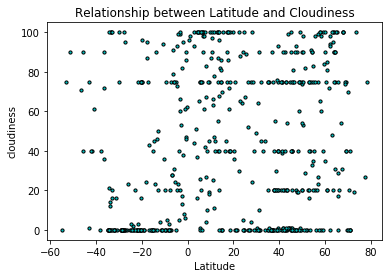

<Figure size 432x288 with 0 Axes>

In [10]:
# create a scatter plot for latitude vs. temperature
plt.scatter(weather_df['latitude'], weather_df['cloudiness'], s = 10, 
            color = 'c', edgecolor = 'black',linewidth=1)

# add labels and show plot
plt.title('Relationship between Latitude and Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('cloudiness')
plt.show()

# save figure
plt.savefig("WEATHERPY_Cloudiness_Latitude.png")

#### Latitude vs. Wind Speed Plot

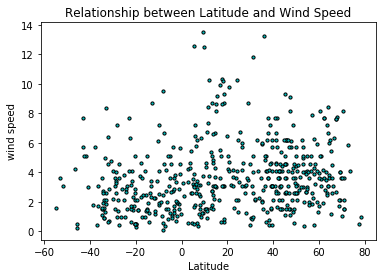

<Figure size 432x288 with 0 Axes>

In [11]:
# create a scatter plot for latitude vs. temperature
plt.scatter(weather_df['latitude'], weather_df['wind speed'], s = 10, 
            color = 'c', edgecolor = 'black',linewidth=1)

# add labels and show plot
plt.title('Relationship between Latitude and Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('wind speed')
plt.show()

# save figure
plt.savefig("WEATHERPY_WindSpeed_Latitude.png")